<a href="https://colab.research.google.com/github/HelmyPurnomoHidayat22/prak-dwdm/blob/main/Helmy_Purnomo_Hidayat_L200220067_Modul_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset
df = pd.read_csv("insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


<ipython-input-11-9dddbf6433c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=charges.values, y=charges.index, palette='Blues', ax=ax)


<Axes: ylabel='region'>

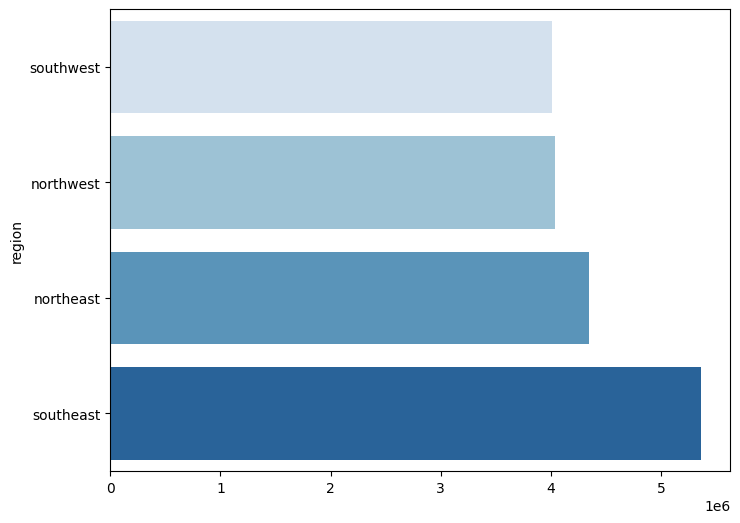

In [11]:
charges = df['charges'].groupby(df['region']).sum().sort_values(ascending=True)

# Membuat figure dan axes
f, ax = plt.subplots(1, 1, figsize=(8, 6))

# Menggunakan barplot dengan keyword arguments untuk x dan y
sns.barplot(x=charges.values, y=charges.index, palette='Blues', ax=ax)



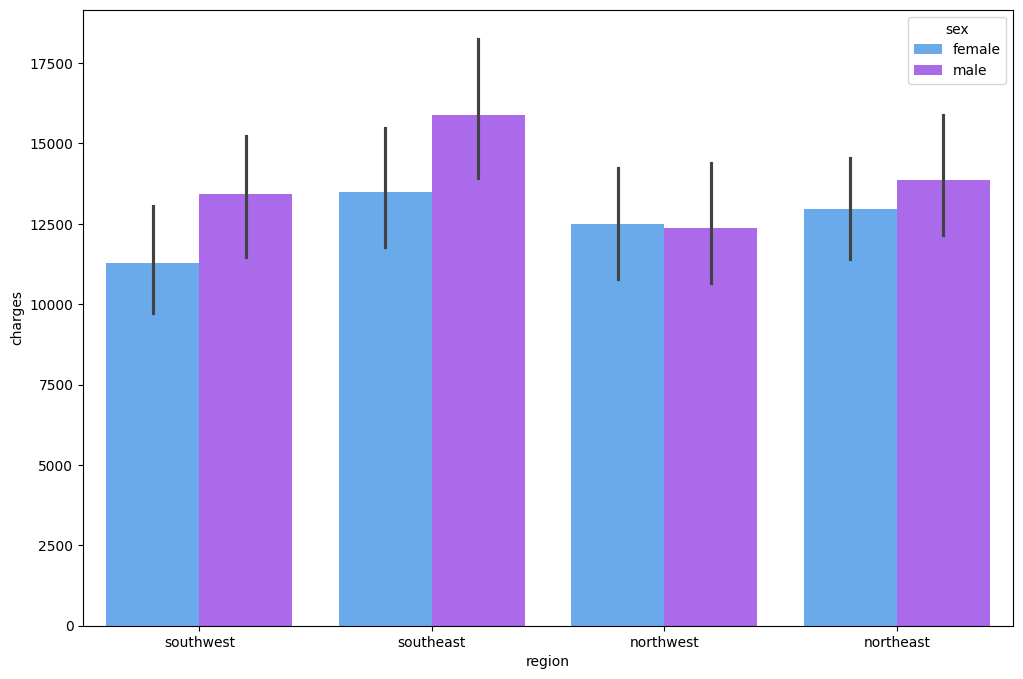

In [9]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')


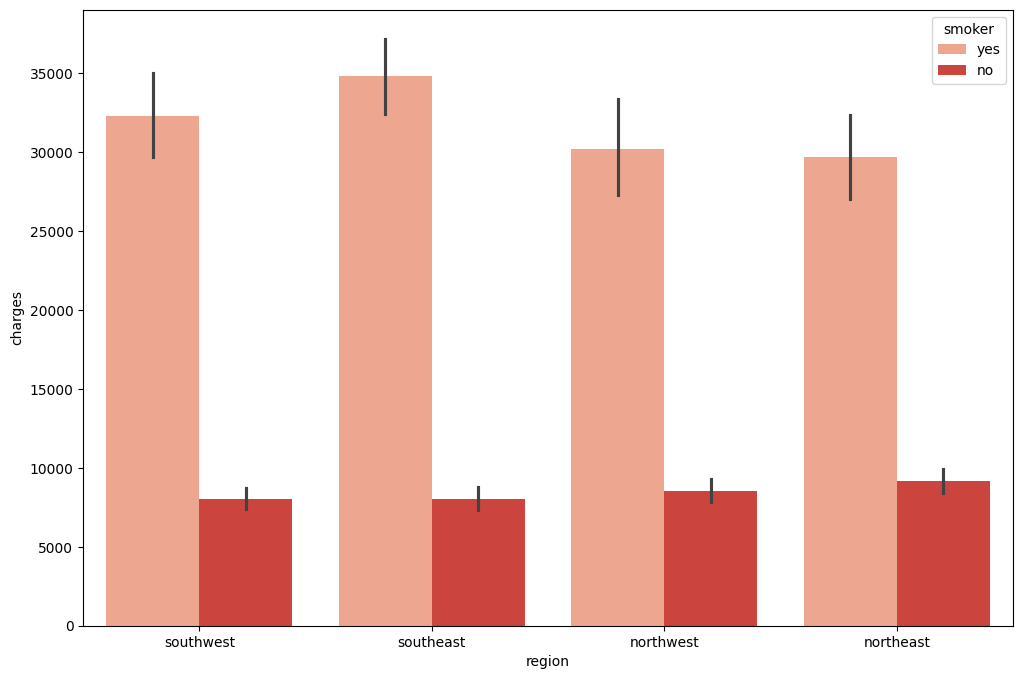

In [12]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='smoker', data=df, palette='Reds')


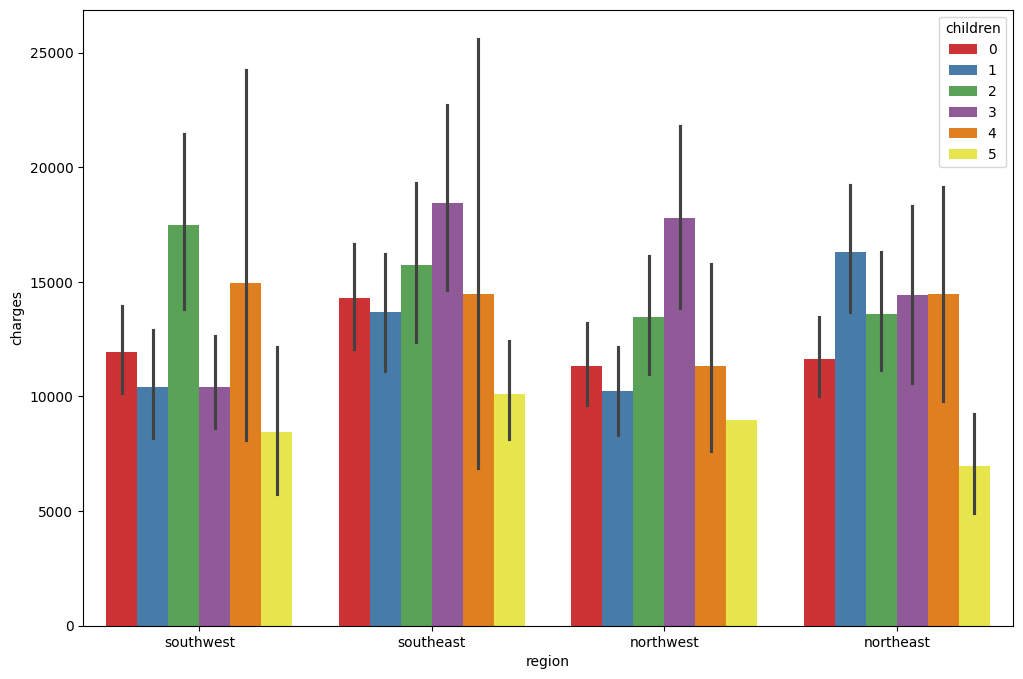

In [13]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')


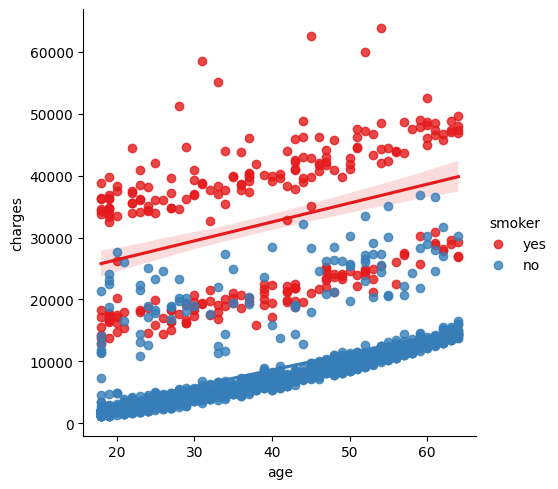

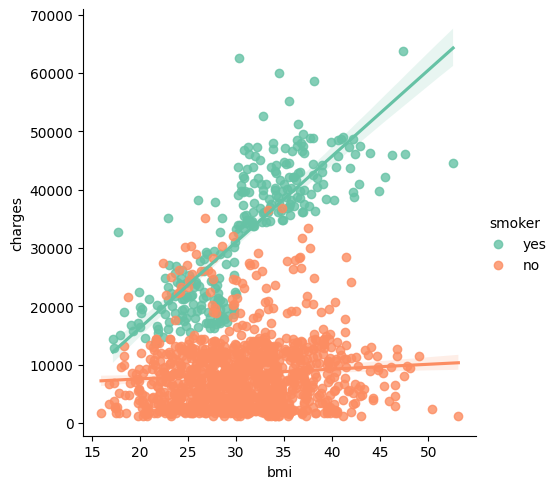

In [14]:
ax = sns.lmplot(x="age", y="charges", data=df, hue="smoker", palette="Set1")
ax = sns.lmplot(x="bmi", y="charges", data=df, hue="smoker", palette="Set2")


In [15]:
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')


In [16]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df.sex = label.fit_transform(df.sex)
df.smoker = label.fit_transform(df.smoker)
df.region = label.fit_transform(df.region)


<ipython-input-19-ff411b66f861>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=charges.values, y=charges.index, palette="Blues", ax=ax)


<Axes: ylabel='region'>

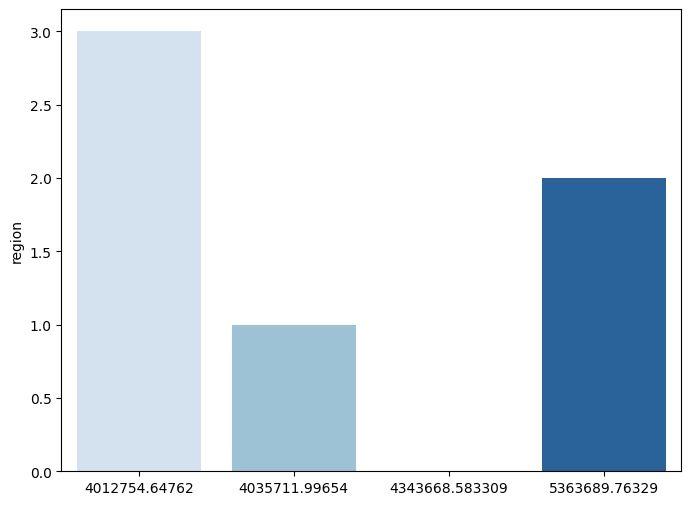

In [19]:
# Mengelompokkan dan mengurutkan total charges berdasarkan region
charges = df['charges'].groupby(df['region']).sum().sort_values(ascending=True)

# Membuat plot
f, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.barplot(x=charges.values, y=charges.index, palette="Blues", ax=ax)

In [21]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [22]:
X = df.drop(['charges'], axis=1)  # Menghapus kolom target 'charges' dari fitur
y = df['charges']                # Kolom target
X_train, X_test, y_train, y_test = holdout(X, y, test_size=0.2, random_state=0)


In [24]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


LinearRegression()

In [29]:
R2 = metrics.r2_score(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# Menampilkan hasil evaluasi
print('R2 : (0:.3f)'.format (R2))
print('RSME:(0:.3f)'.format (rmse))

R2 : (0:.3f)
RSME:(0:.3f)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
sns.regplot(x='age', y='charges', data=df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Relationship Between Age and Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


In [30]:
importance = linear_reg.coef_
variables = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
for i,v in zip(variables,importance):
    print('Feature: %s, Score: %.5f' % (i,v))


Feature: age, Score: 253.99185
Feature: sex, Score: -24.32455
Feature: bmi, Score: 328.40262
Feature: children, Score: 443.72930
Feature: smoker, Score: 23568.87948
Feature: region, Score: -288.50857


###***TUGAS***###

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Memuat dataset
df = pd.read_csv('Real estate.csv')

# Menampilkan 5 baris pertama untuk melihat struktur data
df.head()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [46]:
# Memeriksa informasi dataset
df.info()

# Memeriksa nilai yang hilang
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


,0
No,0
X1 transaction date,0
X2 house age,0
X3 distance to the nearest MRT station,0
X4 number of convenience stores,0
X5 latitude,0
X6 longitude,0
Y house price of unit area,0


<ipython-input-65-5c45478f1831>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['X2 house age'].fillna(df['X2 house age'].mean(), inplace=True)
<ipython-input-65-5c45478f1831>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

RMSE: 7.387891796775484
R²: 0.6746481382828156
Koefisien:  [-2.70593236e-01 -4.55249601e-03  1.10512079e+00  2.36092831e+02
 -2.39036942e+01]
Intercept:  -2946.6588590244446


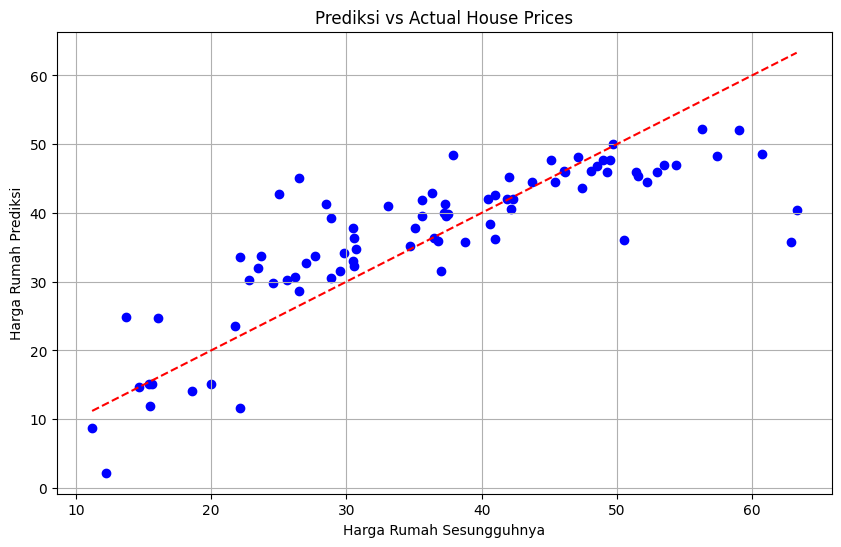

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# 1. Membaca dataset
df = pd.read_csv('Real estate.csv')

# 2. Mengisi nilai yang hilang (Jika ada)
df['X2 house age'].fillna(df['X2 house age'].mean(), inplace=True)
df['X3 distance to the nearest MRT station'].fillna(df['X3 distance to the nearest MRT station'].mean(), inplace=True)
df['X4 number of convenience stores'].fillna(df['X4 number of convenience stores'].mean(), inplace=True)
df['X5 latitude'].fillna(df['X5 latitude'].mean(), inplace=True)
df['X6 longitude'].fillna(df['X6 longitude'].mean(), inplace=True)

# 3. Mengubah kolom kategorikal menjadi numerik (Label Encoding)
le = LabelEncoder()

# Jika kolom 'region' dan 'smoker' ada, pastikan Anda menyesuaikan dengan dataset yang ada
# Jika kolom-kolom tersebut tidak ada, hapus kode ini atau sesuaikan dengan data yang ada
# df['region'] = le.fit_transform(df['region'])
# df['smoker'] = le.fit_transform(df['smoker'])

# 4. Menentukan variabel independen (X) dan dependen (y)
X = df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = df['Y house price of unit area']

# 5. Membagi dataset menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Membuat model regresi linier
model = LinearRegression()

# 7. Melatih model
model.fit(X_train, y_train)

# 8. Memprediksi harga rumah pada data testing
y_pred = model.predict(X_test)

# 9. Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R²: {r2}')

# 10. Menampilkan koefisien dan intercept model
print('Koefisien: ', model.coef_)
print('Intercept: ', model.intercept_)

# 11. Menampilkan plot antara nilai yang diprediksi dan nilai yang sebenarnya
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue')  # Plot data asli vs prediksi
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Garis referensi untuk prediksi sempurna
plt.title('Prediksi vs Actual House Prices')
plt.xlabel('Harga Rumah Sesungguhnya')
plt.ylabel('Harga Rumah Prediksi')
plt.grid(True)
plt.show()